# Streaming camera feed

In this lesson, you will learn:

1. Use a for loop to display multiple images
2. Inline streaming
3. Write an endless loop to perform non-stop streaming
4. Add a button to stop the camera feed

## Stream the camera feed in jupyter lab

To stream the camera feed, we simply use a loop to display the image captured by the camera. <br>
Let's try to write a simple for loop

In [2]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


Similarly, we use a for loop to capture 10 images and display them

In [3]:
## Import libaries and functions

%run Common_functions.ipynb

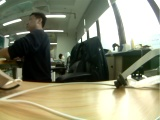

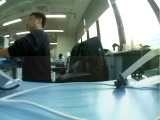

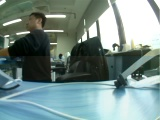

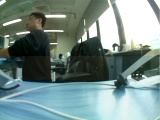

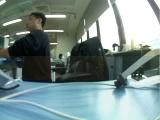

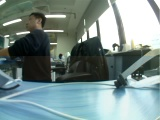

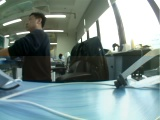

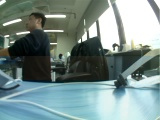

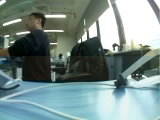

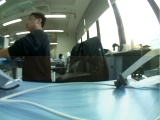

In [18]:
cap = cv2.VideoCapture(0)
setCaptureProperties(cap, 160,120,30)

for i in range(10):
    ret, frame = cap.read()
    
    if ret:
        frame = cv2.flip(frame, 0)
        _, frame = cv2.imencode('.jpeg', frame)
        display(Image(data=frame.tobytes()))
    else:
        print("failed")

# Release the webcam
cap.release()

### Discussion
- What is the problem of the above output?
- Does it look like a video?
- If not, how should a video look like?



## Inline streaming

- We can used a `update` method of a `display` object to update the image we read from the camera. The result looks much more like a video feed.
- We have increased the loop from 10 to 100. Feel free to change it to a bigger number. 

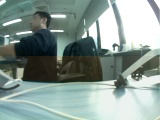

finished


In [23]:
cap = cv2.VideoCapture(0)
setCaptureProperties(cap, 160,120,30)
display_handle=display(None, display_id=True)


for i in range(100):
    ret, frame = cap.read()
    
    if ret:
        frame = cv2.flip(frame, 0)
        _, frame = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))
    else:
        print("failed")

# Release the webcam
cap.release()
print("finished")

## Write an endless loop to perform non-stop streaming

You can write a program that never stop running as easy as below. But if you do so, you need to use the `stop`(1) or `restart kernel`(2) button to stop the program from running. 

![stop/restart](./resource/stop_restart.png)

- When you start running the cell below, the numbering on the left hand side will show a `[*]`. It means the programming is running.
- I have add a timer to sleep so that the program would not fill up our screen with hello
- Make sure you know how to stop the program before running the cell below
- When you stop it, it will show an error and it is normal
- Now try to run the program and press stop(1)

In [4]:
import time

while True:
    print("hello")
    time.sleep(2)

hello


KeyboardInterrupt: 

### Non-stop streaming

The program below will not stop until you hit the stop button

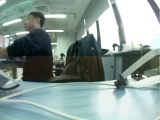

KeyboardInterrupt: 

In [9]:
cap = cv2.VideoCapture(0)
setCaptureProperties(cap, 160,120,30)
display_handle=display(None, display_id=True)


while True:
    ret, frame = cap.read()
    
    if ret:
        frame = cv2.flip(frame, 0)
        _, frame = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))

# Release the webcam
cap.release()
print("finished")

## Add a button to stop the camera feed

To make it more user friendly, let's add a stop button below the cell to stop the program

In [7]:
def createStopButton():
    import ipywidgets as widgets
    return widgets.ToggleButton(
        value=False,
        description='Stop',
        disabled=False,
        button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='Description',
        icon='square' # (FontAwesome names without the `fa-` prefix)
    )

In [5]:
def view(button):
    cap = cv2.VideoCapture(0)
    
    setCaptureProperties(cap, 640, 480, 30)

    display_handle=display(None, display_id=True)
    i = 0
    while True:
        ret, frame = cap.read()
    
        if ret:
            frame = cv2.flip(frame, 0)
            _, frame = cv2.imencode('.jpeg', frame)
            display_handle.update(Image(data=frame.tobytes()))

        if stopButton.value==True:
            cap.release()
            display_handle.update(None)

            
# Run
# ================
stopButton = createStopButton()
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

None

## Step 1c - Record a video into a mp4 file using your webcam

In [6]:
# Display function
# ================
def view(button):
    cap = cv2.VideoCapture(0)
    
    setCaptureProperties(cap, 640, 480, 30)

    display_handle=display(None, display_id=True)
    i = 0
    while True:
        _, frame = cap.read()
        # frame = cv2.flip(frame) # if your camera reverses your image
        _, frame = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)

            
# Run
# ================
stopButton = createStopButton()
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

None

### Problem: The camera is flipped

Use `cv2.flip(image, code)` to flip a frame

![alt text](./resource/xy-axes.png)

```


code
0  means flipping around the x-axis 
1  means flipping around y-axis
-1 means flipping around both axes
```

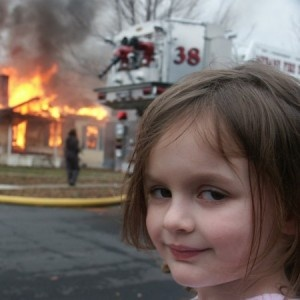

In [34]:
import cv2
from IPython.display import Image, display

# Load the image
image = cv2.imread('resource/dgirl_300.jpg')

# Display the image
display(Image(data=cv2.imencode('.jpg', image)[1].tobytes()))

### Flip X axis (0)

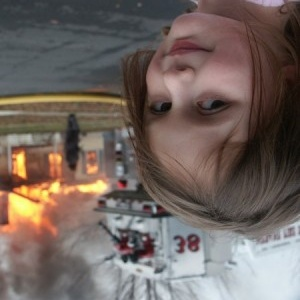

In [36]:
import cv2
from IPython.display import Image, display

# Load the image
image = cv2.imread('resource/dgirl_300.jpg')
image = cv2.flip(image,0)

# Display the image
display(Image(data=cv2.imencode('.jpg', image)[1].tobytes()))

In [ ]:
### Flip Y-axis (1)

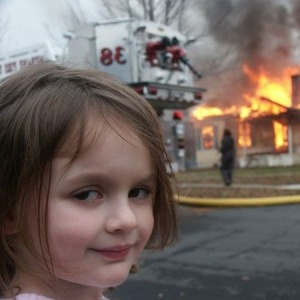

In [37]:
import cv2
from IPython.display import Image, display

# Load the image
image = cv2.imread('resource/dgirl_300.jpg')
image = cv2.flip(image,1)

# Display the image
display(Image(data=cv2.imencode('.jpg', image)[1].tobytes()))

### Flip both axes (-1)

Replace the `???` in the code below with the correct code to flip both axes

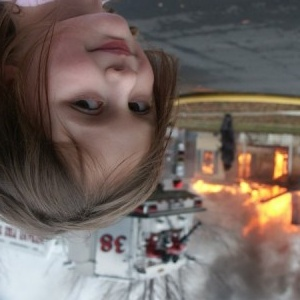

In [40]:
import cv2
from IPython.display import Image, display

# Load the image
image = cv2.imread('resource/dgirl_300.jpg')
image = cv2.flip(image, ???)

# Display the image
display(Image(data=cv2.imencode('.jpg', image)[1].tobytes()))

## Put text on the video

In [16]:
def putText(frame):
    # Define the text properties
    text = 'Your Annotation'
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_position = (50, 50)
    text_scale = 1
    text_color = (0, 255, 0)
    text_thickness = 2

    # Add text annotation on the frame
    cv2.putText(frame, text, text_position, font, text_scale, text_color, text_thickness)


In [22]:
# Stop button
# ================
stopButton = genStopButton()

# Display function
# ================
def view(button):
    cap = cv2.VideoCapture(0)

    width = 160
    height = 120
    fps=30
    
    # set the capture properties
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)
    cap.set(cv2.CAP_PROP_FPS, 30)


    display_handle=display(None, display_id=True)
    i = 0
    while True:
        _, frame = cap.read()
        frame = cv2.flip(frame, 1) # if your camera reverses your image
        putText(frame)
        _, frame = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)


# Run
# ================
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

None